In [4]:
from imdb import IMDb
import pprint as pp
import numpy as np
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [5]:
# This script takes the unique IMDb identifier for any show's first episode (found in the url), 
# and creates a heatmap of episode and season ratings. For example, the url for the first episode of the show Friends is 
# https://www.imdb.com/title/tt0583459/?ref_=ttep_ep1
# The unique id is the numeric 0583459. Some example first episode IDs are found below.

# IASIP
# episode_number = "0612823"

# Friends 
# episode_number = "0583459"

# Simpsons
# episode_number = '0348034'

# Community
# episode_number = '1467481'

# Breaking Bad
# episode_number = '0959621'

# The Boys
episode_number = '7775902'

# https://imdbpy.readthedocs.io/en/latest/usage/quickstart.html
i = IMDb()

# create a list to store all episode data
data = []

# The below while loop gets the episode data for the first episode using the unique ID. Extract the Season, Episode, Rating data. 
# Append the Season, Episode, Rating data to our list. Break the while loop once we've retrieved all episodes.

# In my next update to this this script, I will rewrite the loop to take any episode ID, instead of just the first. 
# I will then use the IMDb library to get a count of the episodes and the relative position of the provided episode ID, and
# traverse the episodes efficiently, depending on the relative position of the provided episode ID. This will eliminate the
# need for a Break statement and will replace with while loop with a more sophisticated for loop.

while episode_number:
    try:
        raw_episode = i.get_movie_main(episode_number)
        raw_episode_data = raw_episode["data"]
        formatted_episode_data = {'Season' : raw_episode_data['season'], 
                                  'Episode' : raw_episode_data['episode'], 
                                  'Rating' : raw_episode_data['rating']}
        data.append(formatted_episode_data)
        episode_number = raw_episode_data["next episode"]
    except KeyError:
        break

In [4]:
# create a Pandas dataframe from our episode data list.
df = pd.DataFrame(data)

In [5]:
# We want to display each season's average episode rating. Let's create a subsequent dataframe for only the relevant info.

df_season_rating = df[['Season', 'Rating']].copy()

# calculate the mean 
df_season_rating = df_season_rating.groupby('Season').mean()

# Rename the column to match the calculation
df_season_rating = df_season_rating.rename(columns={'Rating': 'Average'})
df_season_rating = df_season_rating.reset_index()

# Round to 1 decimal place
df_season_rating = df_season_rating.round(1)
df_season_rating = df_season_rating.set_index("Season")

In [6]:
# Combine our calculated mean data with the IMDb scraped data.
rating_pivot = df.pivot("Season", "Episode", "Rating")
df_pivot = pd.DataFrame(rating_pivot)
df_pivot['Average'] = df_season_rating

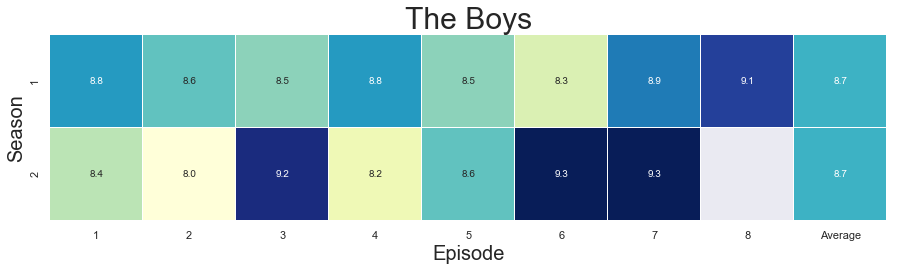

In [7]:
# Creates a heatmap of all episode's ratings and the mean episode rating per season. 

fig, ax = plt.subplots(figsize=(15,15))
ax.set_ylabel(ylabel=None, fontsize = 20)
ax.set_xlabel(xlabel=None, fontsize = 20)

plt.title(str(raw_episode_data['episode of']['title']), size = 30)

heatmap_episode_rating = sns.heatmap(df_pivot, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = "YlGnBu", 
                                     robust = True, cbar=False,ax=ax, yticklabels=True)